In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import StandardScaler
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
warnings.simplefilter(action="ignore")

#EXPLORATORY DATA ANALYSIS

In [2]:
data = pd.read_csv('winequality-white.csv', sep=';')

In [3]:
data.head(7)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
data.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.85,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4898.0,0.28,0.10,0.08,0.21,0.26,0.32,1.10
citric acid,4898.0,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4898.0,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4898.0,0.05,0.02,0.01,0.04,0.04,0.05,0.35
free sulfur dioxide,4898.0,35.31,17.01,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4898.0,138.36,42.50,9.00,108.00,134.00,167.00,440.00
density,4898.0,0.99,0.00,0.99,0.99,0.99,1.00,1.04
pH,4898.0,3.19,0.15,2.72,3.09,3.18,3.28,3.82
sulphates,4898.0,0.49,0.11,0.22,0.41,0.47,0.55,1.08


## Outcome Analysis

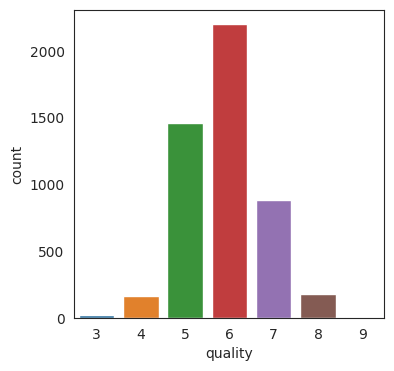

In [6]:
# Set figure size and resolution
plt.figure(figsize=(4,4), dpi=100)

# Set seaborn style to remove grid lines
sns.set_style('white')

# Count of target varible
sns.countplot(x='quality', data=data);

#Correlation Matrix

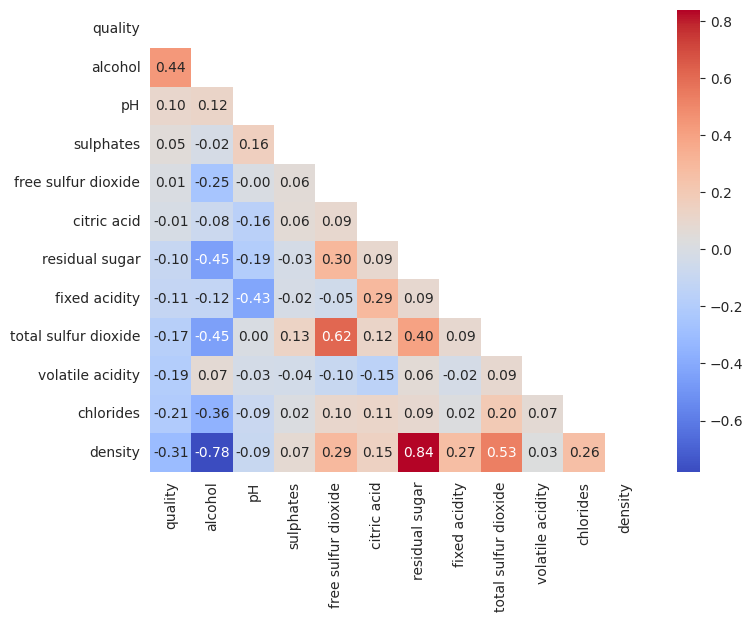

In [7]:
k = 12 #number of variables for heatmap
cols = data.corr().nlargest(k, 'quality')['quality'].index # returns the k columns that have the largest correlation coefficients
                                                                # with the 'quality' variable, sorted in descending order
cm = data[cols].corr()
# Create a mask to display only the upper triangle
mask = np.zeros_like(cm)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(8, 6), dpi=100)
sns.heatmap(cm, mask=mask, cmap='coolwarm', annot=True, fmt='.2f');

##Histogram Plots

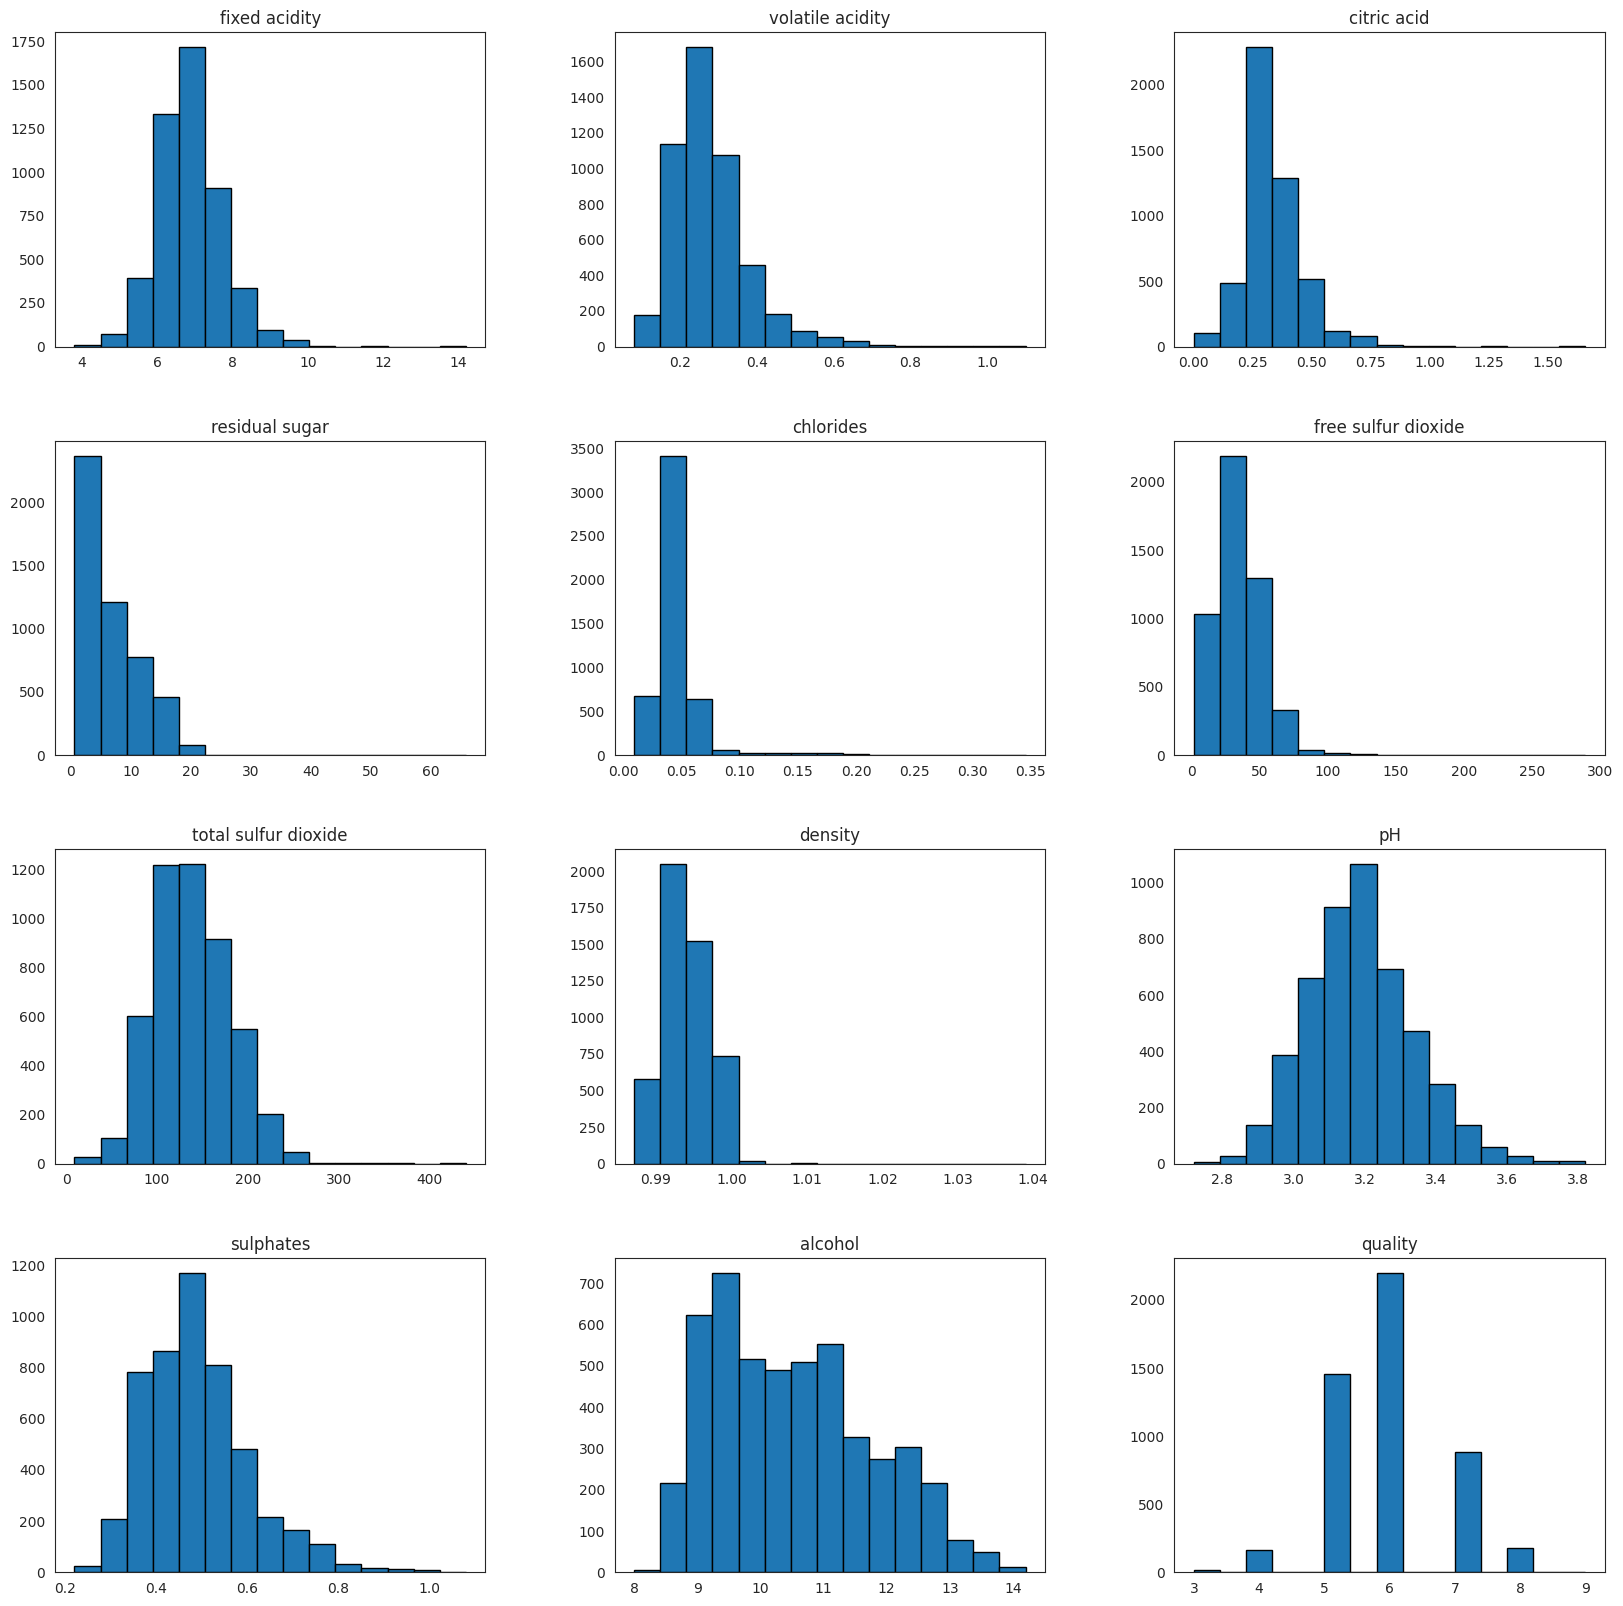

In [8]:
# plot histogram
data.hist(figsize=(20,20), grid=False, bins=15, edgecolor='black');

##Boxplots

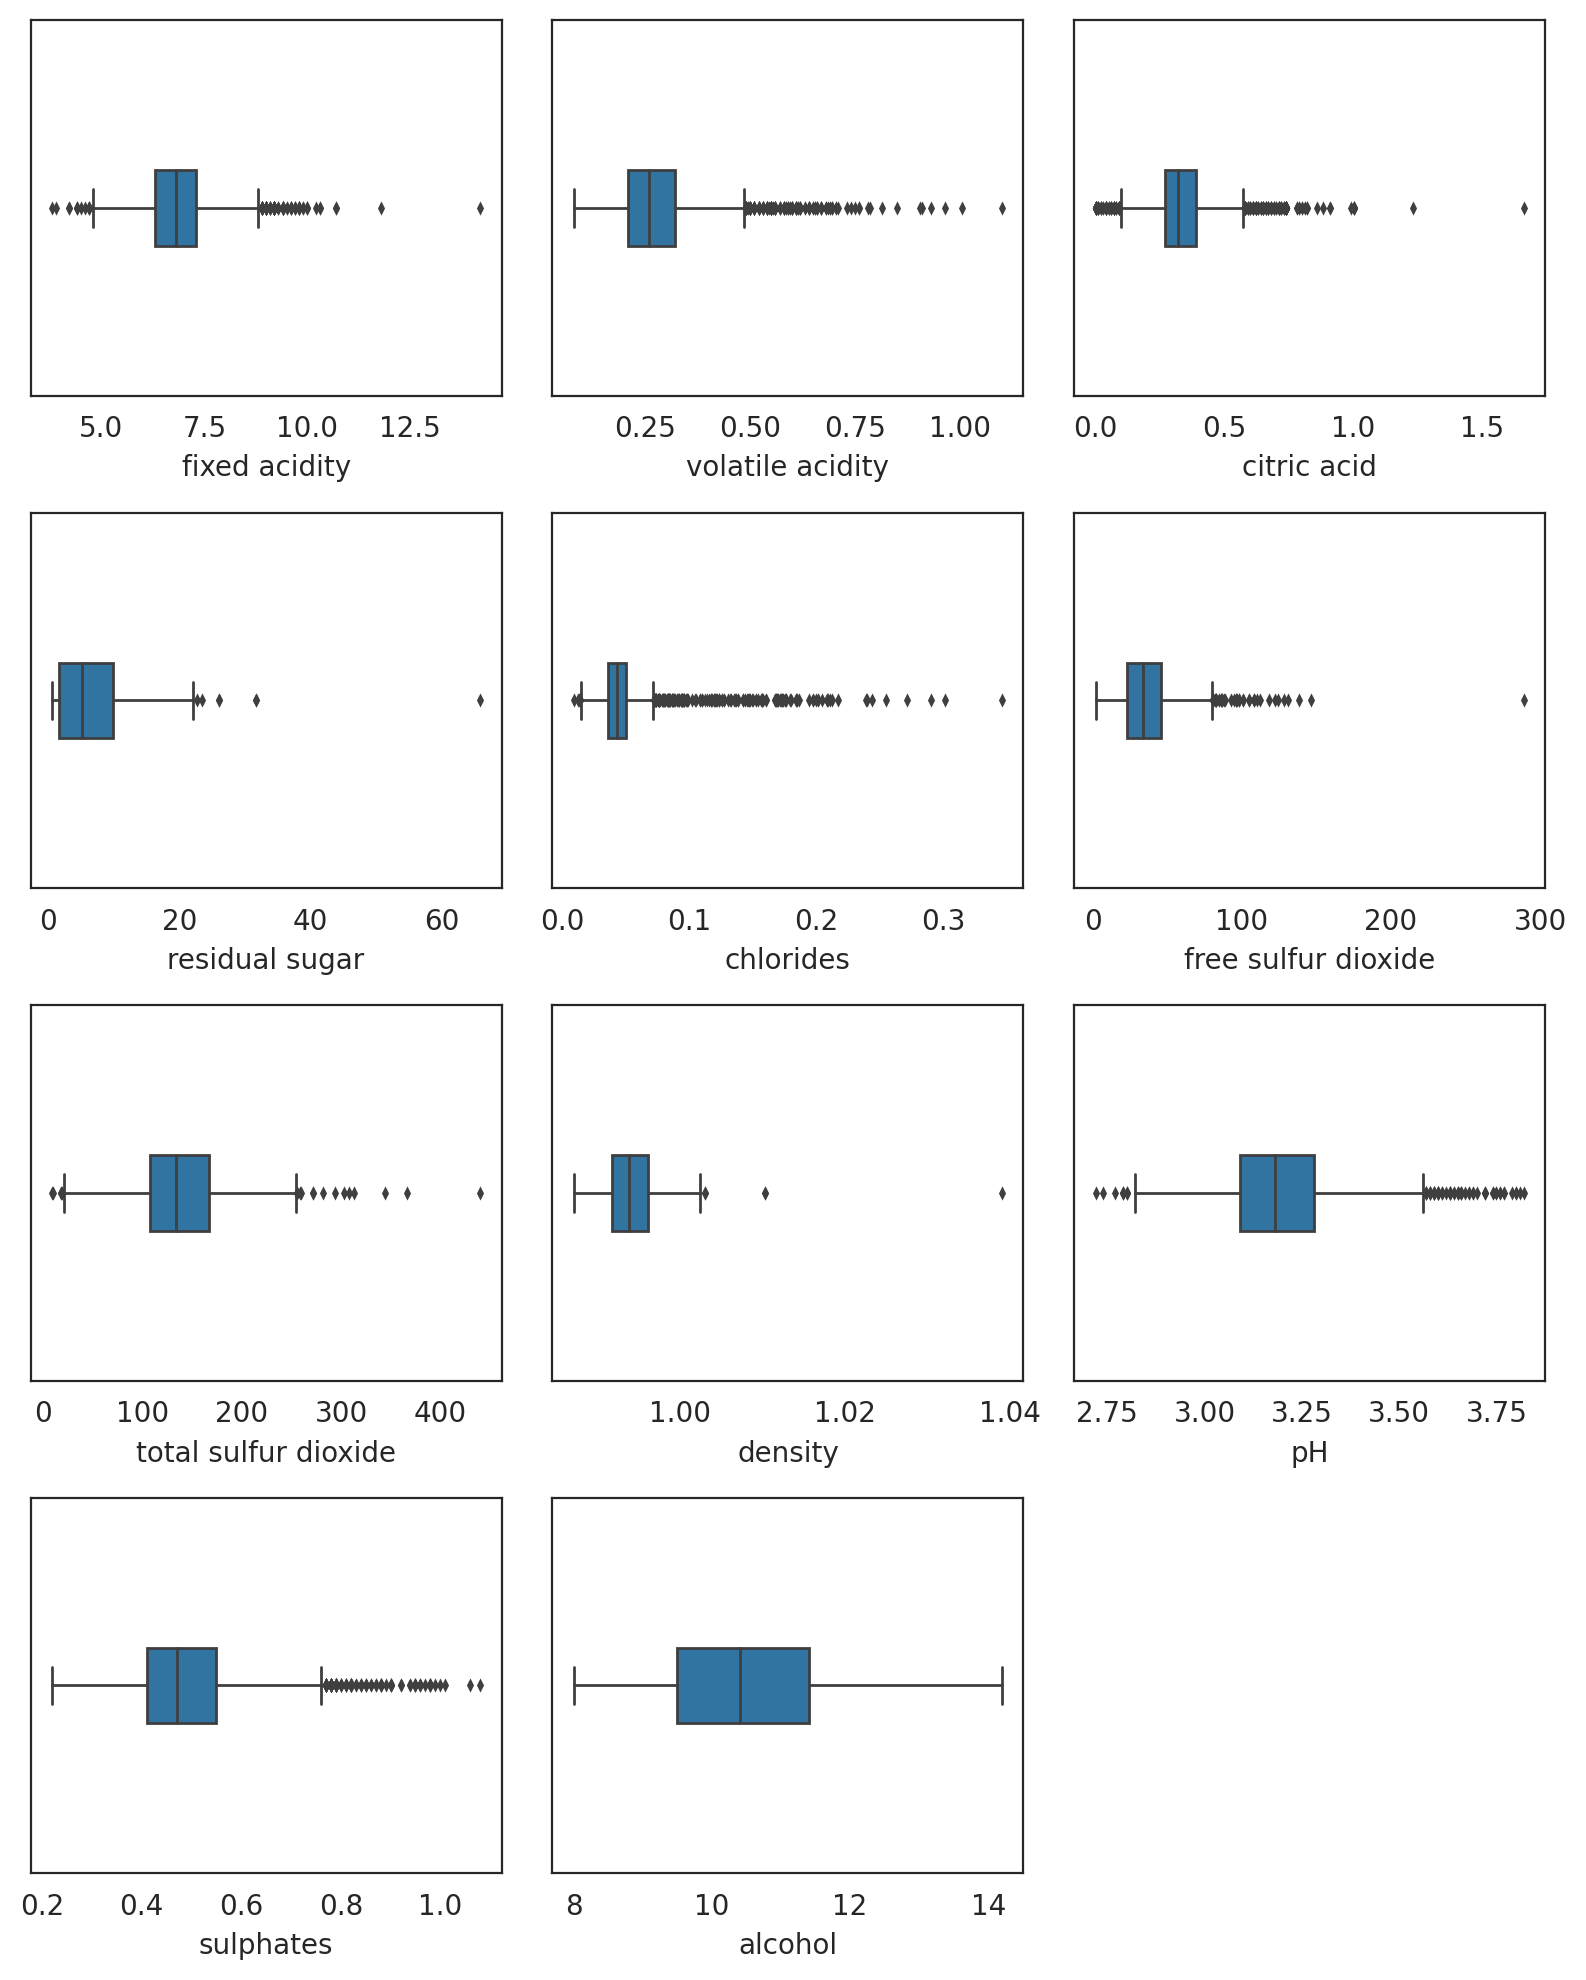

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(8, 10), dpi=200)

sns.boxplot(data=data, x="fixed acidity", width=0.2, linewidth=1, fliersize=2, ax=axs[0, 0])
sns.boxplot(data=data, x="volatile acidity", width=0.2, linewidth=1, fliersize=2, ax=axs[0, 1])
sns.boxplot(data=data, x="citric acid", width=0.2, linewidth=1, fliersize=2, ax=axs[0, 2])
sns.boxplot(data=data, x="residual sugar", width=0.2, linewidth=1, fliersize=2, ax=axs[1, 0])
sns.boxplot(data=data, x="chlorides", width=0.2, linewidth=1, fliersize=2, ax=axs[1, 1])
sns.boxplot(data=data, x="free sulfur dioxide", width=0.2, linewidth=1, fliersize=2, ax=axs[1, 2])
sns.boxplot(data=data, x="total sulfur dioxide", width=0.2, linewidth=1, fliersize=2, ax=axs[2, 0])
sns.boxplot(data=data, x="density", width=0.2, linewidth=1, fliersize=2, ax=axs[2, 1])
sns.boxplot(data=data, x="pH", width=0.2, linewidth=1, fliersize=2, ax=axs[2, 2])
sns.boxplot(data=data, x="sulphates", width=0.2, linewidth=1, fliersize=2, ax=axs[3, 0])
sns.boxplot(data=data, x="alcohol", width=0.2, linewidth=1, fliersize=2, ax=axs[3, 1])

# Remove the empty subplot
fig.delaxes(axs[3, 2])

plt.tight_layout();

# DATA PREPROCESSING

##Removing Outliers

In [10]:
# Defining the z-score funtion
def detect_outliers_zscore(data, threshold=3):  # The default z-score threshold is taken as 3, which is a common choice for a standard normal distribution.
                                                #The points above this threshold will be considered as an outlier and will be removed from dataset.
    z_scores = np.abs((data - np.mean(data, axis=0)) / np.std(data, axis=0))
    return z_scores > threshold

In [11]:
# Detecting the number of outliers in each column
outliers = detect_outliers_zscore(data)
print(np.sum(outliers, axis=0)) # print the number of outliers for each feature (column)

fixed acidity            46
volatile acidity         81
citric acid              85
residual sugar            9
chlorides               102
free sulfur dioxide      32
total sulfur dioxide     12
density                   3
pH                       32
sulphates                48
alcohol                   0
quality                  25
dtype: int64


In [12]:
# Removing the detected outliers
data = data[~outliers.any(axis=1)]
data.shape # It is seen that  rows have been removed

(4487, 12)

##Feature Creation

In [13]:
def quality_map(quality):
    if quality <= 5:
        return 'bad'
    elif quality ==6:
      return 'average'
    else:
        return 'good'

# Change 'quality' column by applying the quality_map function to it
data['quality'] = data['quality'].apply(quality_map)

In [14]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,average
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,average
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,average
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,average


##Data Encoding

In [15]:
data.quality.value_counts()

average    2038
bad        1433
good       1016
Name: quality, dtype: int64

In [16]:
# Define the mapping between categories and labels
category_mapping = {'bad': 0,'average': 1,'good': 2 }

# Use the mapping to convert the categories to labels
data['quality'] = data['quality'].map(category_mapping)

In [17]:
data.quality.value_counts()

1    2038
0    1433
2    1016
Name: quality, dtype: int64

##Creating Features and Target Variables

In [18]:
X = data.drop('quality', axis=1).values
y= data['quality'].values

##Feature Selection using PCA

In [19]:
# Scale data for PCA
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [20]:
#Perform PCA
from sklearn.decomposition import PCA
pca = PCA()
X = pca.fit_transform(X)

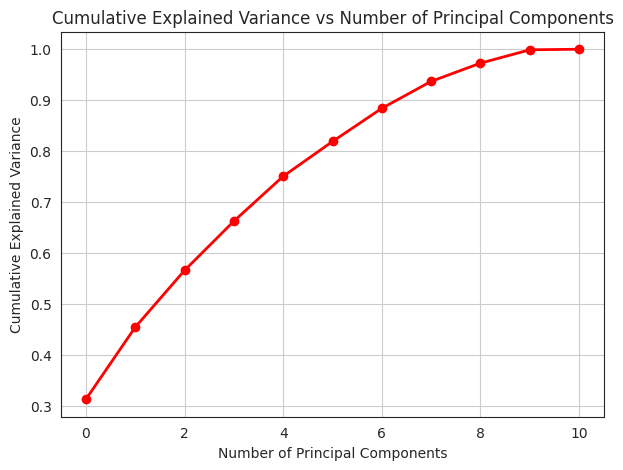

In [21]:
# Get the explained variance of each component
explained_var = pca.explained_variance_ratio_

# Get the cumulative explained variance
cumulative_var = np.cumsum(explained_var)

# Plot the cumulative explained variance
plt.figure(figsize=(7,5))
plt.plot(cumulative_var, 'ro-', linewidth=2)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs Number of Principal Components')
plt.grid();

In [22]:
pca_new = PCA(n_components=6)
X = pca_new.fit_transform(X)

##Splitting Dataset into Train and Test Sets

In [23]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23, stratify=y)

#MODELLING

## Selecting a Model

In [24]:
# Setting random seed for reproducibility
np.random.seed(23)

# Define models to be evaluated
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier())]

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    # Evaluate the model using cross-validation score:
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    # Print mean of the cross validation results
    msg = "%s: %.1f%%" % (name, cv_results.mean() * 100)
    print(msg)

LR: 54.4%
KNN: 57.1%
CART: 62.4%
RF: 68.1%
SVR: 58.4%
XGBM: 67.1%
GB: 60.0%


## Model Tuning for RF Classifier

In [25]:
# This cell has a time-consuming command that has been skipped using a magic command below
# The chosen model is tuned to find best hyperparameter using range of params below
# The tuned model is saved at the and to be used later
%%script echo skipping  

# Define a random forest model
rf_model = RandomForestClassifier()

rf_params = {
    "n_estimators": [100,200,500,1000],  # The number of decision trees in the random forest.
    "max_features": ["auto",3,6,7],      # The maximum number of features to consider when looking for the best split at each node.
    "min_samples_split": [2,5,10,30],    # The minimum number of samples required to split an internal node.
    "max_depth": [3,5,8,None],           # The maximum depth of the decision trees in the forest.None means unlimited depth.
    "min_samples_leaf": [1, 2]           # minimum number of samples required to be at a leaf node
}

    
# Perform a grid search to find the best combination of hyperparameters using cross-validation
rf_cv_model = GridSearchCV(
    rf_model,              # The model we want to optimize
    rf_params,             # The dictionary of hyperparameters and their values
    cv=10,                 # The number of folds for cross-validation
    n_jobs=-1,             # The number of CPU cores to use for parallelizing the grid search (-1 means to use all available cores)
    verbose=2,             # Controls the level of output text during the grid search
).fit(X_train, y_train)    # Fit the grid search to the training data

# Print the best hyperparameters found by the grid search
print(rf_cv_model.best_params_)

# Create the final random forest model using the best hyperparameters found by the grid search, and fit it to the data
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X_train, y_train)

from joblib import dump, load
# Save the tuned and trained RandomForestClassifier model
dump(rf_tuned, 'rf_tuned.joblib');

skipping


In [26]:
# Create an instance of the RandomForestClassifier
model = RandomForestClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

RandomForestClassifier()

##Confusion Matrix

In [27]:
# Make predictions on test data
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", cm)
print("Accuracy: %.1f%%" % (accuracy * 100));

Confusion Matrix:
 [[199  87   1]
 [ 75 291  42]
 [  5  80 118]]
Accuracy: 67.7%


#### Heatmap of Confusion Matrix

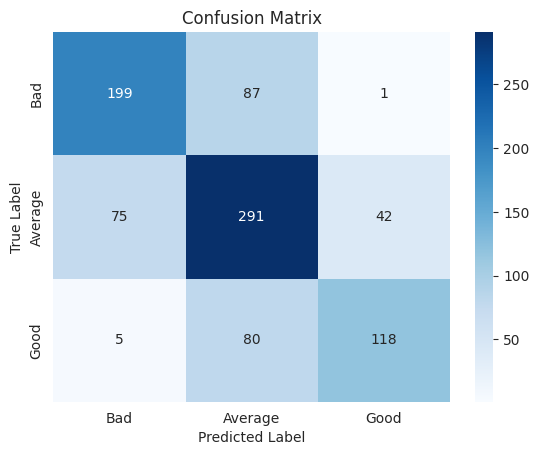

In [28]:
# Define class labels
class_labels = ['Bad', 'Average', 'Good']

# Define heatmap
ax = sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Set tick labels
ax.set_xticklabels(class_labels)
ax.set_yticklabels(class_labels);

In [29]:
#END

In [30]:
%%script echo skipping

skipping
